<a href="https://colab.research.google.com/github/hasitanalluri/mlgroupproject/blob/main/ML_Project_Part_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# We downloaded our dataset from https://healthdata.gov/Hospital/COVID-19-Reported-Patient-Impact-and-Hospital-Capa/g62h-syeh/about_data
df = pd.read_csv('/content/COVID-19_Reported_Patient_Impact_and_Hospital_Capacity_by_State_Timeseries__RAW__20250227.csv')
#print(df.head())
print(df.columns)

Index(['state', 'date', 'critical_staffing_shortage_today_yes',
       'critical_staffing_shortage_today_no',
       'critical_staffing_shortage_today_not_reported',
       'critical_staffing_shortage_anticipated_within_week_yes',
       'critical_staffing_shortage_anticipated_within_week_no',
       'critical_staffing_shortage_anticipated_within_week_not_reported',
       'hospital_onset_covid', 'hospital_onset_covid_coverage',
       ...
       'previous_day_admission_pediatric_covid_confirmed_5_11',
       'previous_day_admission_pediatric_covid_confirmed_5_11_coverage',
       'previous_day_admission_pediatric_covid_confirmed_unknown',
       'previous_day_admission_pediatric_covid_confirmed_unknown_coverage',
       'staffed_icu_pediatric_patients_confirmed_covid',
       'staffed_icu_pediatric_patients_confirmed_covid_coverage',
       'staffed_pediatric_icu_bed_occupancy',
       'staffed_pediatric_icu_bed_occupancy_coverage',
       'total_staffed_pediatric_icu_beds',
       't

1. **What is in your data?**

Our data covers the reported hospital capacities, staffing rates, and COVID-19 rates across time in the United States. As seen above, it has a *lot* of variables (135 columns).


In [3]:
df['state'].unique()

array(['MA', 'WY', 'LA', 'RI', 'KS', 'ME', 'MS', 'SD', 'ID', 'ND', 'AK',
       'NE', 'NH', 'DC', 'MN', 'IA', 'NM', 'NV', 'CO', 'MT', 'HI', 'DE',
       'NC', 'WV', 'OR', 'CT', 'MD', 'PR', 'SC', 'VT', 'VI', 'NJ', 'OK',
       'KY', 'VA', 'WI', 'AL', 'AS', 'UT', 'WA', 'MI', 'AR', 'NY', 'OH',
       'MO', 'FL', 'PA', 'TX', 'CA', 'TN', 'IN', 'AZ', 'GA', 'IL'],
      dtype=object)

As seen above, the data ranges over all 50 U.S. states, as well as 4 territories:

PR (Puerto Rico),
VI (U.S. Virgin Islands),
AS (American Samoa), and
DC (District of Columbia).

In [4]:
df['date'] = pd.to_datetime(df['date'])
df['timestamp_float'] = df['date'].astype('int64') / 10**9  # Convert to seconds since epoch (float)
first_timestamp_float = df['timestamp_float'].min()
last_timestamp_float = df['timestamp_float'].max()
first_timestamp = pd.to_datetime(first_timestamp_float, unit='s')
last_timestamp = pd.to_datetime(last_timestamp_float, unit='s')
print(f"First Timestamp (original format): {first_timestamp}")
print(f"Last Timestamp (original format): {last_timestamp}")

First Timestamp (original format): 2020-01-01 00:00:00
Last Timestamp (original format): 2024-04-27 00:00:00


The datapoints range across 4 years of time, starting at the beginning of 2020 and ending April 27, 2024.

In [5]:
print(df['critical_staffing_shortage_today_yes'].head())
print(df['critical_staffing_shortage_today_no'].head())
print(df['critical_staffing_shortage_today_not_reported'].head())

0     6
1     2
2    41
3     4
4    13
Name: critical_staffing_shortage_today_yes, dtype: int64
0     72
1     26
2    176
3      9
4    133
Name: critical_staffing_shortage_today_no, dtype: int64
0    1
1    2
2    6
3    2
4    4
Name: critical_staffing_shortage_today_not_reported, dtype: int64


Something a little weird about the data is that the staffing shortage variables are just numbers of hospitals, reporting 'yes', 'no', or not at all. I think using just the 'yes' will be a reasonable way to work with the data, and can lead to some cool visualizations:

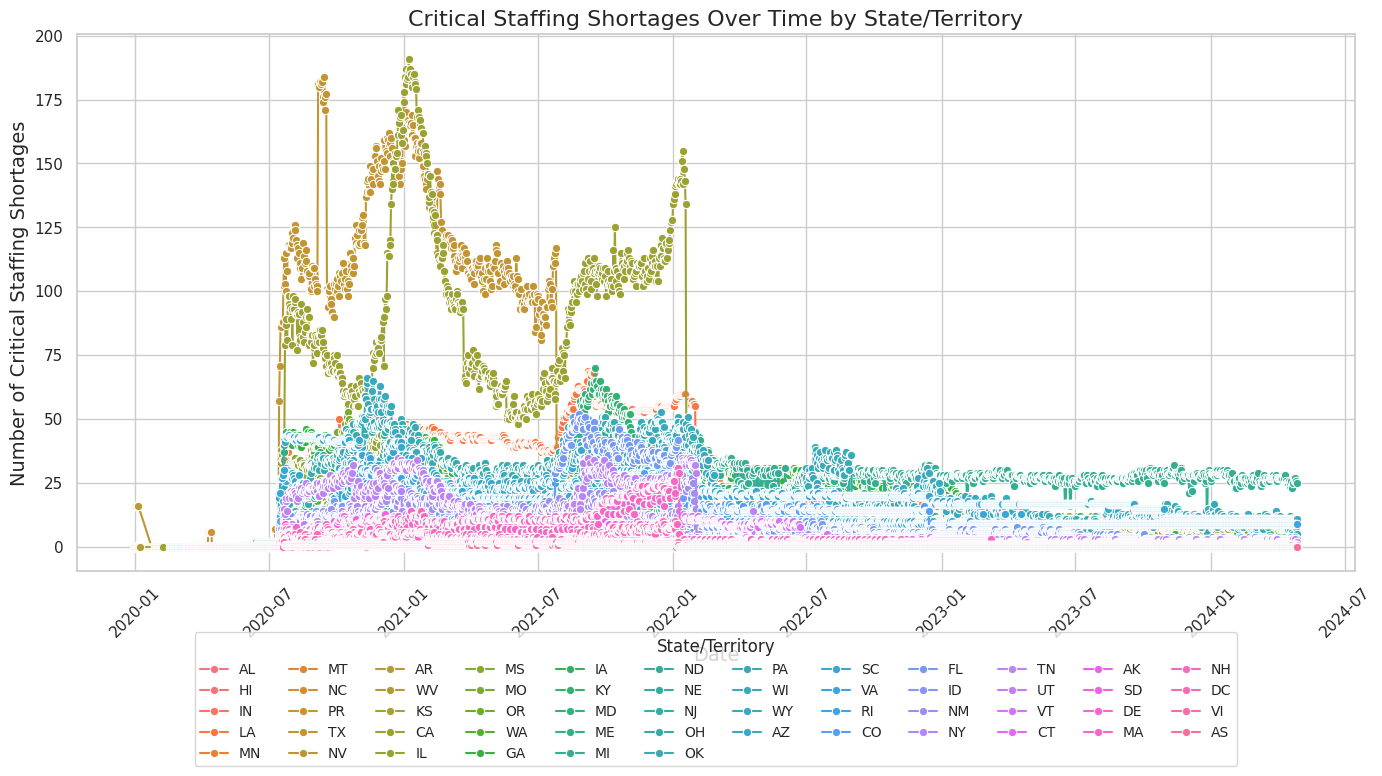

In [6]:
grouped_df = df.groupby(['date', 'state'])['critical_staffing_shortage_today_yes'].sum().reset_index()
sns.set(style="whitegrid")
plt.figure(figsize=(14, 8))
sns.lineplot(data=grouped_df, x='date', y='critical_staffing_shortage_today_yes', hue='state', marker='o')
plt.title('Critical Staffing Shortages Over Time by State/Territory', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Critical Staffing Shortages', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='State/Territory', bbox_to_anchor=(0.5, -0.1), loc='upper center', ncol=12, fontsize=10)
plt.tight_layout()
plt.show()

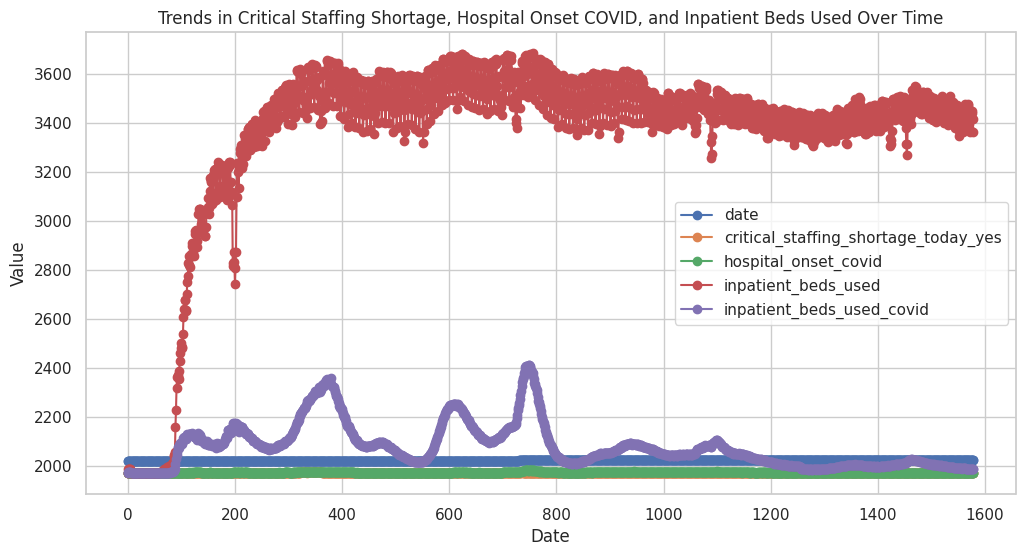

In [21]:
# See if there is a relationship between hospital staff shortages, COVID-19 onset, and inpatient beds used (COVID-19-specific and generally) over time
# Did not group by state, just want to see if there are any general trends
overall_criticalstaffshortage = df.groupby(['date'])['critical_staffing_shortage_today_yes'].sum().reset_index()
overall_hospitalonsetcovid = df.groupby(['date'])['hospital_onset_covid'].sum().reset_index()
overall_inpatientbedsused = df.groupby(['date'])['inpatient_beds_used'].sum().reset_index()
overall_inpatientbedsusedcovid = df.groupby(['date'])['inpatient_beds_used_covid'].sum().reset_index()

# Combine overall_criticalstaff shortage, overall_hospitalonsetcovid, overall_inpatientbedsused, overall_inpatientbedsusedcovid into one merged df
merged_df = pd.merge(overall_criticalstaffshortage, overall_hospitalonsetcovid, on='date', how='outer')
merged_df = pd.merge(merged_df, overall_inpatientbedsused, on='date', how='outer')
merged_df = pd.merge(merged_df, overall_inpatientbedsusedcovid, on='date', how='outer')

# sns.set(style="whitegrid")
merged_df.plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Trends in Critical Staffing Shortage, Hospital Onset COVID, and Inpatient Beds Used Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

It is hard to visualize relationships between any of these four variables because the # inpatient beds used & # inpatient beds used for COVID-19 is much higher. One solution to fix this is to try plotting the arcsinh on all the variables instead, to put all the values on a similar scale.

Index(['date', 'critical_staffing_shortage_today_yes', 'hospital_onset_covid',
       'inpatient_beds_used', 'inpatient_beds_used_covid'],
      dtype='object')


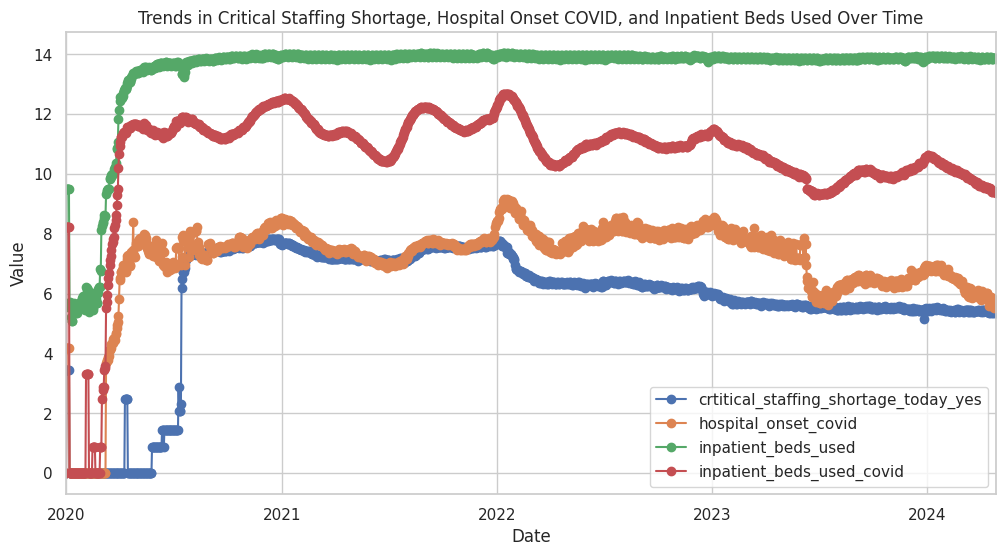

In [36]:
print(merged_df.columns)
df_arcsinh = pd.DataFrame()
df_arcsinh["date"] = merged_df["date"]
df_arcsinh["crtitical_staffing_shortage_today_yes"] = np.arcsinh(merged_df["critical_staffing_shortage_today_yes"])
df_arcsinh["hospital_onset_covid"] = np.arcsinh(merged_df["hospital_onset_covid"])
df_arcsinh["inpatient_beds_used"] = np.arcsinh(merged_df["inpatient_beds_used"])
df_arcsinh["inpatient_beds_used_covid"] = np.arcsinh(merged_df["inpatient_beds_used_covid"])

df_arcsinh.set_index("date", inplace=True)
df_arcsinh.plot(kind='line', marker='o', figsize=(12, 6))
plt.title('Trends in Critical Staffing Shortage, Hospital Onset COVID, and Inpatient Beds Used Over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.show()

2. **How will these data be useful for studying the phenomenon you're interested in?**



We are interested in studying the incidence of COVID-19 by state over time and how hospital capacity was impacted. Our dataset consists of observations of daily state aggregated reports that include information on the number of hospitalized patients with or suspected to have COVID-19, hospitals with critical staff shortages (or expected to have critical staff shortages), inpatient beds available and used, as well as how many of occupied beds belong to COVID-19 patients. We can conduct interesting analyses and visualizations on this data to see how COVID-19 hospitalizations and hosptial coverage vary with each other and longitudinally.

3. **What are the challenges you've resolved or expect to face in using them?**

While we were looking exploring the data, we noticed that many of the variables are on very different numerical scales (i.e. inpatient beds used is much higher than # hospitals reporting critical staff shortages). This makes data visualization difficiult if we are attempting to plot these variables on the same figure. To resolve this challenge, we plotted the arcsinh of these variables instead.

# Missing Data Exploration & Cleaning

The largest missing chunk is previous pediatric admission and could actually help us subset pediatric hospitals as well.

In [ ]:
for col,num in df.isna().sum().items():
  if num > 0:
    print(f"{col} missing {num} data points")

hospital_onset_covid missing 957 data points
inpatient_beds missing 5 data points
inpatient_beds_used missing 264 data points
inpatient_beds_used_covid missing 846 data points
previous_day_admission_adult_covid_confirmed missing 6781 data points
previous_day_admission_adult_covid_suspected missing 7267 data points
previous_day_admission_pediatric_covid_confirmed missing 7197 data points
previous_day_admission_pediatric_covid_suspected missing 7958 data points
staffed_adult_icu_bed_occupancy missing 7196 data points
staffed_icu_adult_patients_confirmed_and_suspected_covid missing 7877 data points
staffed_icu_adult_patients_confirmed_covid missing 6966 data points
total_adult_patients_hospitalized_confirmed_and_suspected_covid missing 7372 data points
total_adult_patients_hospitalized_confirmed_covid missing 6521 data points
total_pediatric_patients_hospitalized_confirmed_and_suspected_covid missing 7961 data points
total_pediatric_patients_hospitalized_confirmed_covid missing 7199 data 

<Axes: >

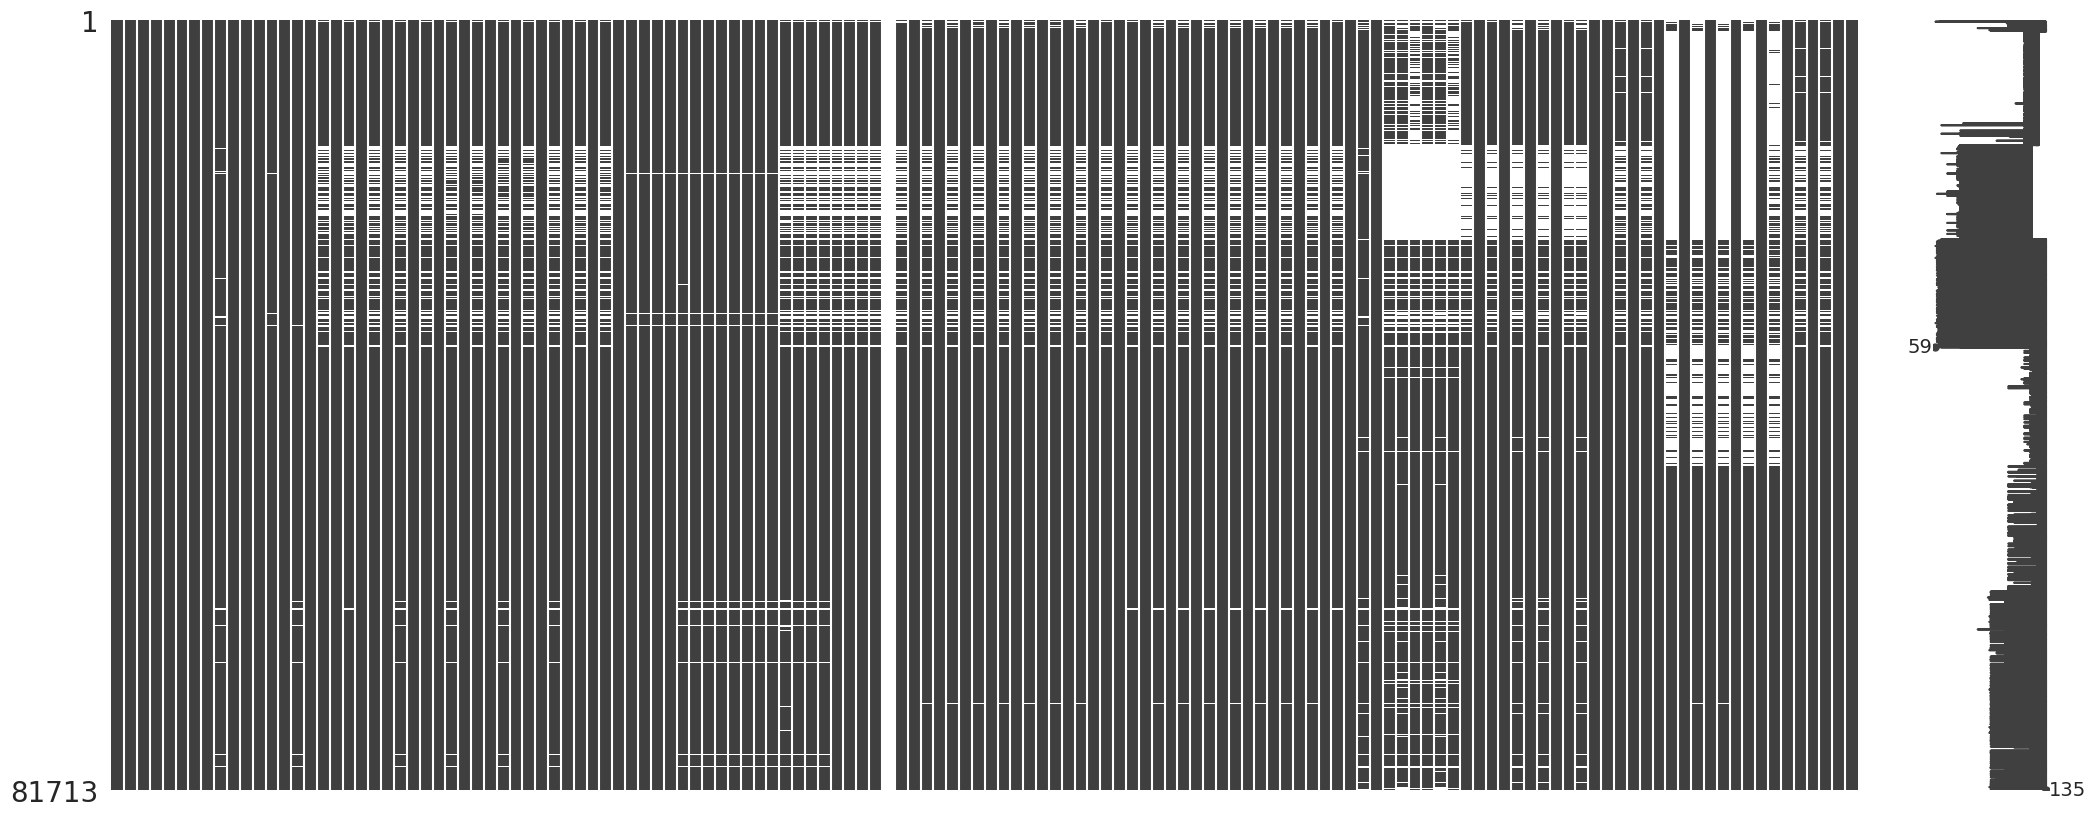

In [ ]:
import missingno

missingno.matrix(df)


*dtypes* should all be good

In [ ]:
for col,dtype in df.dtypes.items():
  if dtype == "object":
    print(f"{col} potentially needs extra cleaning")

state potentially needs extra cleaning
